In [1]:
!pip install gensim

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [2]:
from db import db
import pandas as pd
import gensim
import re

In [3]:
data = db.read()

In [4]:
def copy_column(df):
    df['text'] = df['article_content']
    return df

def remove_puncs(df):
    rm = lambda x: re.sub('[,\.!?]', '', x)
    df['text'] = df['text'].map(rm)
    return df

def lowercase(df):
    lower = lambda x: x.lower()
    df['text'] = df['text'].map(lower)
    return df

data = data.pipe(copy_column).pipe(remove_puncs).pipe(lowercase)     

**This dataset contains a lot of fronend code, which makes it pretty dirty**

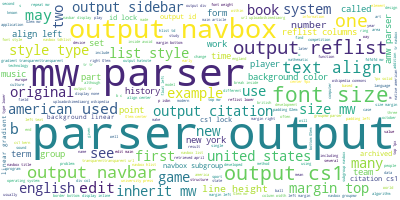

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

long_string = ','.join(list(data['text'].values))

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

wordcloud.generate(long_string)

wordcloud.to_image()

In [6]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

list_data = data['text'].values.tolist()
data_words = list(sent_to_words(list_data))
data_words = remove_stopwords(data_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wanghuan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_words)

id2word.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

In [8]:
from pprint import pprint
# number of topics
num_topics = 8
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, iterations=200)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.010*"displaystyle" + 0.004*"americans" + 0.004*"native" + '
  '0.003*"algorithm" + 0.003*"sidebar" + 0.003*"algebra" + 0.002*"function" + '
  '0.002*"theory" + 0.002*"theta" + 0.002*"polynomial"'),
 (1,
  '0.010*"displaystyle" + 0.005*"field" + 0.004*"hall" + 0.004*"theory" + '
  '0.003*"music" + 0.003*"al" + 0.003*"algebra" + 0.003*"polynomial" + '
  '0.003*"distribution" + 0.003*"arts"'),
 (2,
  '0.003*"al" + 0.003*"games" + 0.003*"television" + 0.003*"game" + '
  '0.003*"century" + 0.002*"league" + 0.002*"computer" + 0.002*"europe" + '
  '0.002*"sports" + 0.002*"arabic"'),
 (3,
  '0.009*"ball" + 0.008*"book" + 0.005*"library" + 0.005*"find" + '
  '0.004*"usage" + 0.004*"cue" + 0.003*"sidebar" + 0.003*"music" + '
  '0.003*"shot" + 0.003*"digit"'),
 (4,
  '0.004*"intel" + 0.003*"hall" + 0.003*"sidebar" + 0.003*"displaystyle" + '
  '0.003*"chess" + 0.002*"game" + 0.002*"team" + 0.002*"september" + '
  '0.002*"biology" + 0.002*"august"'),
 (5,
  '0.009*"displaystyle" + 0.004*"

In [9]:
# !pip install pyLDAvis --user

In [10]:
import pickle 
import pyLDAvis
import os
from pyLDAvis import gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis_data)

In [11]:
pyLDAvis.save_html(vis_data, 'lda.html')

C:\Users\wanghuan\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
